In [1]:
import numpy as np

import Interpolation

%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt


plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'

In [2]:
_=np.loadtxt('example/eos2020.dat')
T,h_tab,g_tab=_[:,0],_[:,1],_[:,2]

In [3]:
h0=Interpolation.Interpolation(T,h_tab)
h1=Interpolation.linearSpline(T,h_tab)
h3=Interpolation.cubicSpline(T,h_tab)# we can also take the first derivatives to vanish at the boundaries because h and g are constrants at low/high-T
dh0=lambda T:1+1/3*T/h0(T)*h0.derivative_1(T)
dh1=lambda T:1+1/3*T/h1(T)*h1.derivative_1(T)
dh3=lambda T:1+1/3*T/h3(T)*h3.derivative_1(T)

g0=Interpolation.Interpolation(T,g_tab)
g1=Interpolation.linearSpline(T,g_tab)
g3=Interpolation.cubicSpline(T,g_tab)# we can also take the first derivatives to vanish at the boundaries because h and g are constrants at low/high-T

<IPython.core.display.Javascript object>


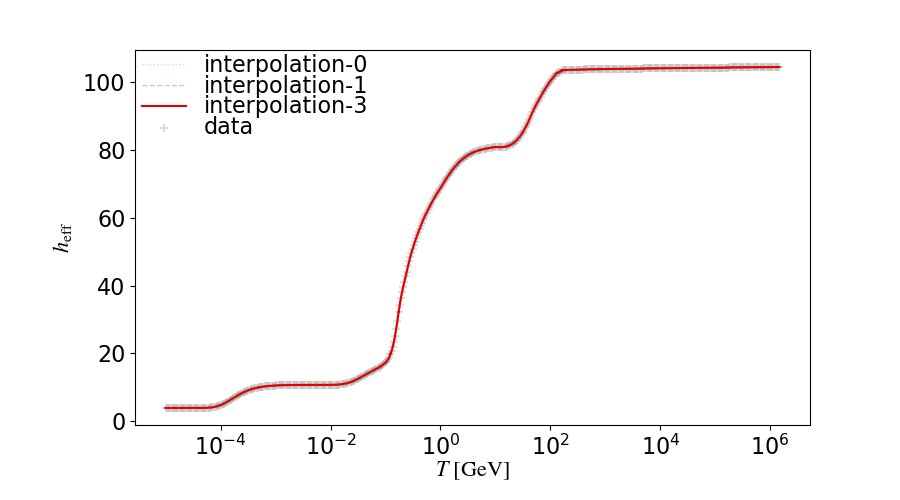

In [4]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

T_int=np.logspace(np.log10(min(T)),np.log10(max(T)),len(T)*10)

Y_0=[h0(_) for _ in T_int]
sub.plot(T_int,Y_0,linestyle=':',linewidth=1,alpha=0.2,c='xkcd:blue',label='interpolation-0')

Y_1=[h1(_) for _ in T_int]
sub.plot(T_int,Y_1,linestyle='--',linewidth=1,alpha=0.2,c='xkcd:black',label='interpolation-1')

Y_3=[h3(_) for _ in T_int]
sub.plot(T_int,Y_3,linestyle='-',linewidth=1.5,alpha=1,c='xkcd:red',label='interpolation-3')

sub.scatter(T,h_tab,alpha=0.3,c='xkcd:gray',marker='+',label='data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$T ~ [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.09) 
sub.set_ylabel(r'$h_{\rm eff}$')
sub.yaxis.set_label_coords(-0.09,0.5) 
sub.set_xscale('log')
sub.set_yscale('linear')

fig.show()

<IPython.core.display.Javascript object>


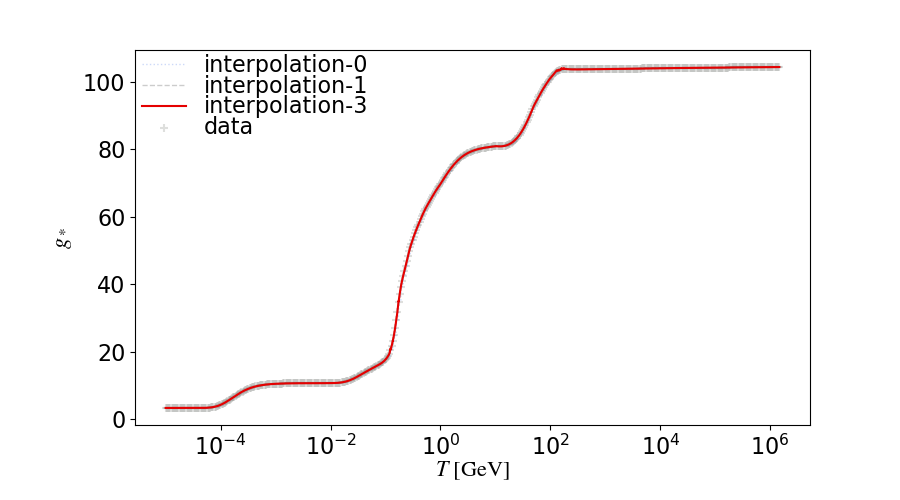

In [5]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

T_int=np.logspace(np.log10(min(T)),np.log10(max(T)),len(T)*10)

Y_0=[g0(_) for _ in T_int]
sub.plot(T_int,Y_0,linestyle=':',linewidth=1,alpha=0.2,c='xkcd:blue',label='interpolation-0')

Y_1=[g1(_) for _ in T_int]
sub.plot(T_int,Y_1,linestyle='--',linewidth=1,alpha=0.2,c='xkcd:black',label='interpolation-1')

Y_3=[g3(_) for _ in T_int]
sub.plot(T_int,Y_3,linestyle='-',linewidth=1.5,alpha=1,c='xkcd:red',label='interpolation-3')

sub.scatter(T,g_tab,alpha=0.3,c='xkcd:gray',marker='+',label='data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$T ~ [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.09) 
sub.set_ylabel(r'$g_{\rm *}$')
sub.yaxis.set_label_coords(-0.09,0.5) 
sub.set_xscale('log')
sub.set_yscale('linear')

fig.show()

<IPython.core.display.Javascript object>


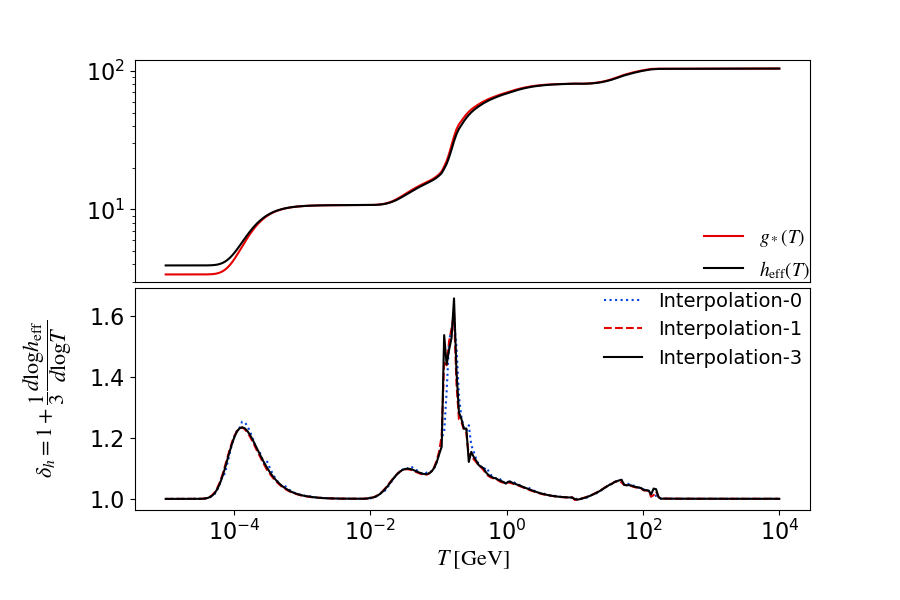

In [6]:
fig=plt.figure(figsize=(9,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.03)
fig.suptitle('')

sub = fig.add_subplot(2,1, 1)

T=np.logspace(-5,4,250)

gt=[g3(i) for i in T]
ht=[h3(i) for i in T]
dht0=[dh0(i) for i in T]
dht1=[dh1(i) for i in T]
dht3=[dh3(i) for i in T]


sub.plot(T,gt,linestyle='-',c='xkcd:red',label=r"$g_{\rm *} (T)$")
sub.plot(T,ht,linestyle='-',c='xkcd:black',label=r"$h_{\rm eff} (T)$")


sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)

sub.set_yscale('log')
sub.set_xscale('log')
sub.get_xaxis().set_visible(False)

sub.set_ylim(3,1.2e2)

sub = fig.add_subplot(2,1,2)

sub.plot(T,dht0,linestyle=':',c='xkcd:blue',label=r"Interpolation-0")
sub.plot(T,dht1,linestyle='--',c='xkcd:red',label=r"Interpolation-1")
sub.plot(T,dht3,linestyle='-',c='xkcd:black',label=r"Interpolation-3")

sub.legend(bbox_to_anchor=(0.99, 0.99),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

sub.set_ylabel(r'$\delta_h=1+\dfrac{1}{3} \dfrac{d \log h_{\rm eff}}{d \log T}$')
sub.yaxis.set_label_coords(-0.09,0.5) 

sub.set_yscale('linear')
sub.set_xscale('log')


sub.set_xlabel(r'$T \; [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.17) 



fig.show()